In [157]:
import pydicom
import matplotlib.pyplot as plt
# SOURCE SCRIPTS
#https://github.com/ReubenDo/ReMIND/

In [166]:
def main(id=70):
    # Load the DICOM file

    t1contrast_pre_path = f'../data/ReMIND_dataset/ReMIND-Manifest-Sept-2023/ReMIND/ReMIND-020/12-25-1982-Preop-99162/1.000000-3DAXT1postcontrast-11531/1-0{id}.dcm'
    t1contrast_intra_path = f'../data/ReMIND_dataset/ReMIND-Manifest-Sept-2023/ReMIND/ReMIND-020/12-25-1982-Intraop-24150/6.000000-3DAXT1postcontrast-64739/1-0{id}.dcm'
    tumor_path = '../data/ReMIND_dataset/ReMIND-Manifest-Sept-2023/ReMIND/ReMIND-020/12-25-1982-Preop-99162/303.000000-tumor seg - MR ref 3DAXT1postcontrast-97101/1-1.dcm'
    t1_contrast_pre_dicom = pydicom.dcmread(t1contrast_pre_path)
    t1_contrast_intra_dicom = pydicom.dcmread(t1contrast_intra_path)
    tumor_dicom = pydicom.dcmread(tumor_path)
    return t1_contrast_pre_dicom, t1_contrast_intra_dicom, tumor_dicom

In [167]:
pre, post, tumor = main(63)
plt.imshow(tumor.pixel_array[:, :, 63], cmap='jet', alpha=0.9)  # Overlay the 'tumor' with transparency

plt.imshow(pre.pixel_array, cmap='gray')  # Display the grayscale 'pre' image

plt.axis('off')  # Remove axis
plt.show()  # Display both images

FileNotFoundError: [Errno 2] No such file or directory: '../home/adil/Documents/TUE/preparationPhase/myProject/data/ReMIND_dataset/ReMIND-Manifest-Sept-2023/ReMIND/ReMIND-020/12-25-1982-Preop-99162/303.000000-tumor seg - MR ref 3DAXT1postcontrast-97101/1-1.dcm'

In [160]:
tumor.keys()

dict_keys([(0008,0005), (0008,0008), (0008,0016), (0008,0018), (0008,0020), (0008,0021), (0008,0023), (0008,0030), (0008,0031), (0008,0033), (0008,0050), (0008,0060), (0008,0070), (0008,0090), (0008,1030), (0008,103E), (0008,1090), (0010,0010), (0010,0020), (0010,0030), (0010,0040), (0012,0050), (0012,0060), (0012,0062), (0012,0063), (0012,0064), (0012,0071), (0013,0010), (0013,1010), (0013,1013), (0018,0015), (0018,1000), (0018,1020), (0020,000D), (0020,000E), (0020,0010), (0020,0011), (0020,0013), (0020,0052), (0020,1040), (0020,9221), (0020,9222), (0028,0002), (0028,0004), (0028,0008), (0028,0010), (0028,0011), (0028,0100), (0028,0101), (0028,0102), (0028,0103), (0028,0303), (0028,2110), (0062,0001), (0062,0002), (0062,0013), (0070,0080), (0070,0081), (0070,0084), (5200,9229), (5200,9230), (7FE0,0010)])

In [161]:
tumor

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 208
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Segmentation Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.231598691230330579026010155914983094776
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002,0013) Implementation Version Name         SH: '0.5'
(0002,0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['DERIVED', 'PRIMARY']
(0008,0016) SOP Class UID                       UI: Segmentation Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.231598691230330579026010155914

In [144]:
pre.ImagePositionPatient
#pre['0020,0032']

[96.4863, -325.845, 1053.59]

In [156]:
pre

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 204
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.337351950432462206970287739481384686368
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002,0013) Implementation Version Name         SH: '0.5'
(0002,0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'MPR']
(0008,0016) SOP Class UID                       UI: MR Image Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.337351950432462206970287739481

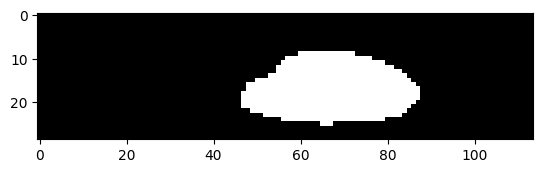

In [87]:
plt.imshow(tumor[:, :, 63], cmap='gray')

In [122]:
import pydicom
import numpy as np

def get_slice_index_from_position(z_position, tumor_dicom):
    # Extract the necessary information from the tumor segmentation DICOM
    slice_thickness = float(tumor_dicom.SliceThickness) if 'SliceThickness' in tumor_dicom else 1.0
    z0 = float(tumor_dicom.ImagePositionPatient[2])  # Z position of the first slice
    slice_spacing = slice_thickness  # Assuming equal slice spacing for simplification
    
    # Calculate the index of the slice corresponding to the given z_position
    slice_index = int((z_position - z0) / slice_spacing)
    return slice_index

def main(id=70):
    # Load the DICOM files
    t1contrast_pre_path = f'../data/ReMIND_dataset/ReMIND-Manifest-Sept-2023/ReMIND/ReMIND-103/12-25-1982-Preop-65502/2.000000-3DAXT1postcontrast-38037/1-0{id}.dcm'
    t1contrast_intra_path = f'../data/ReMIND_dataset/ReMIND-Manifest-Sept-2023/ReMIND/ReMIND-103/12-25-1982-Intraop-69597/5.000000-3DAXT1postcontrast-81474/1-0{id}.dcm'
    tumor_path = '../data/ReMIND_dataset/ReMIND-Manifest-Sept-2023/ReMIND/ReMIND-103/12-25-1982-Preop-65502/303.000000-tumor seg - MR ref 3DAXT1postcontrast-99214/1-1.dcm'
    
    # Read the DICOM files
    t1_contrast_pre_dicom = pydicom.dcmread(t1contrast_pre_path)
    t1_contrast_intra_dicom = pydicom.dcmread(t1contrast_intra_path)
    tumor_dicom = pydicom.dcmread(tumor_path)

    # Get the z position of slice 63 from the T1 contrast DICOM
    z_position = float(t1_contrast_pre_dicom.ImagePositionPatient[2])
    
    # Determine the slice index in the tumor segmentation corresponding to slice 63
    slice_index = get_slice_index_from_position(z_position, tumor_dicom)
    
    # Load the entire tumor segmentation (assuming it's in a 3D numpy array)
    tumor_volume = np.load(tumor_path)  # This depends on how your tumor data is saved
    tumor_slice = tumor_volume[slice_index]

    return t1_contrast_pre_dicom, t1_contrast_intra_dicom, tumor_slice


In [123]:
pre, intra, tumor = main(63)
pre

AttributeError: 'FileDataset' object has no attribute 'ImagePositionPatient'

## REMIND CONVERT BY https://github.com/ReubenDo/ReMIND/

In [152]:
import nibabel as nib
from nilearn.image import resample_to_img
pre_nifti  = nib.load('../data/ReMIND/ReMIND-103/12-25-1982-Preop-65502/2_3D_AX_T1_postcontrast.nii.gz')
post_nifit = nib.load('../data/ReMIND/ReMIND-103/12-25-1982-Intraop-69597/5_3D_AX_T1_postcontrast.nii.gz')
tumor = nib.load('../data/ReMIND/ReMIND-103/12-25-1982-Preop-65502/303_tumor_seg_MR_ref_3D_AX_T1_postcontrast.nii.gz')

FileNotFoundError: No such file or no access: '../data/ReMIND/ReMIND-103/12-25-1982-Preop-65502/303_tumor_seg_MR_ref_3D_AX_T1_postcontrast.nii.gz'

TypeError: Image data of dtype object cannot be converted to float

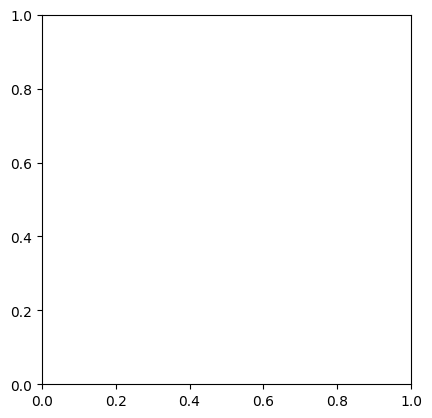

In [150]:
plt.imshow(tumor, cmap='jet', alpha=0.9)  # Overlay the 'tumor' with transparency
plt.show()  # Display both images